In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df = pd.read_csv("../../../BHL_AI/data/final_train.csv", index_col=0)

df.head(30)

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
5,SITTING,-1.575809,-0.640703,-2.460251,-1.849850,0.174633,-0.151900,3.562269,-5.978664,3.611319,...,5.012806,3.784507,4.524738,-6.202087,2.763802,-0.913074,-0.991923,2.783184,0.946387,2.0
6,LAYING,-1.544632,-0.082690,-2.383599,-1.850232,-0.134514,1.509522,4.287757,-11.804038,3.624044,...,5.060741,1.503260,5.408900,-6.020885,3.316649,-0.944660,-1.035018,3.412909,2.096713,1.0
7,STANDING,-1.567323,-0.857850,-2.490082,-1.832982,0.112276,-0.738710,7.961757,-9.302665,3.623865,...,5.060179,2.089889,5.362029,-0.555530,3.272104,-0.942724,-1.030745,-2.238799,2.010097,1.0
8,LAYING,-1.548536,-0.085978,-2.385792,-1.802245,0.152624,1.059657,6.577405,-6.372738,3.615428,...,5.058368,2.487948,5.247866,-6.149970,3.259964,-0.938109,-1.017701,3.282303,1.968382,1.0
9,WALKING_DOWNSTAIRS,-1.574517,-0.779927,-2.460828,-1.826485,-0.089204,1.763456,2.010612,-6.150281,1.208534,...,4.289583,4.563102,2.775124,-3.942224,1.031420,-0.802131,-0.704161,0.571339,-2.101442,2.0


In [3]:
df.shape

(11086, 572)

In [4]:
activities = df.Activity.unique()

activities

array(['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING',
       'WALKING_DOWNSTAIRS'], dtype=object)

In [5]:
activity_count = pd.Series(df.Activity).value_counts()

activity_count

LAYING                2167
SITTING               2019
STANDING              1979
WALKING               1900
WALKING_UPSTAIRS      1633
WALKING_DOWNSTAIRS    1388
Name: Activity, dtype: int64

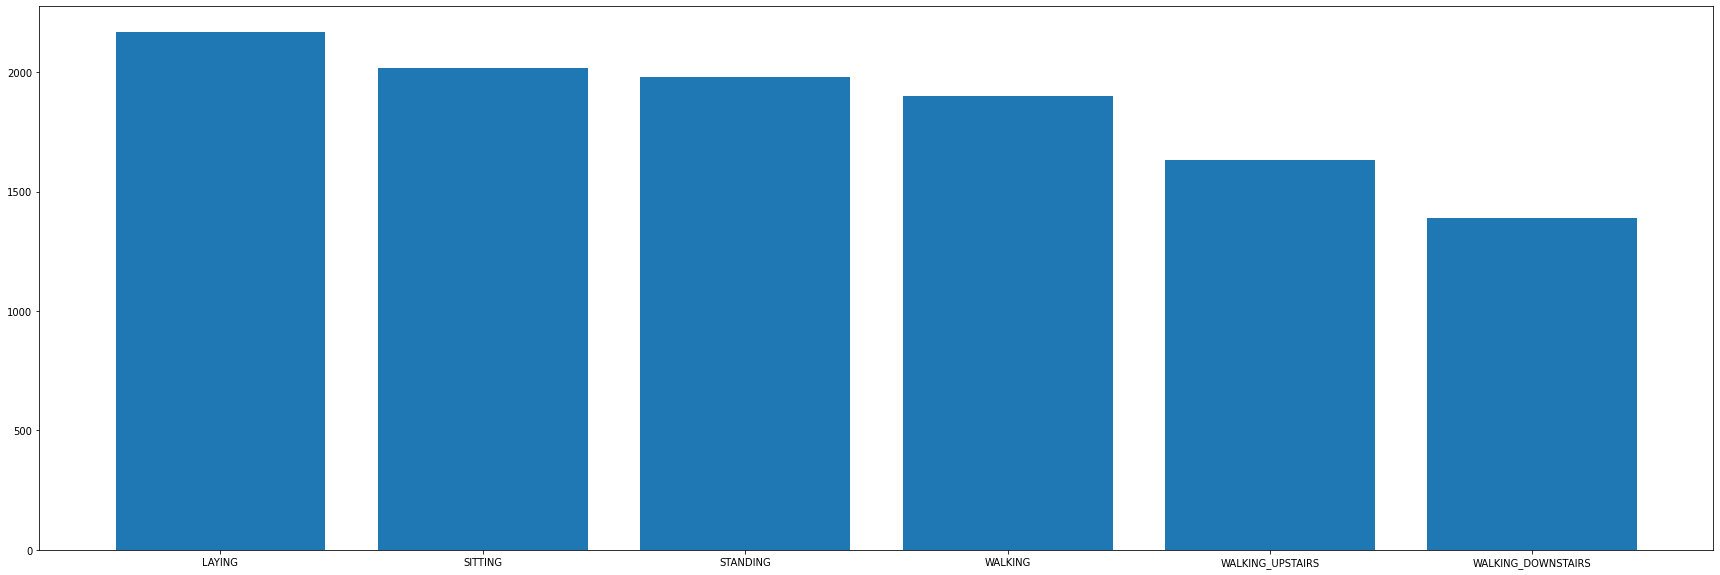

In [6]:
plt.figure(figsize=(30,10))
plt.bar(activity_count.index, activity_count)
plt.show()

In [7]:
label = df['Activity']

In [8]:
df.describe()

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
count,11029.000000,11018.000000,11026.000000,11034.000000,11034.000000,11029.000000,11030.000000,11026.000000,11035.000000,11027.000000,...,11029.000000,11045.000000,11041.000000,11027.000000,11027.000000,11021.000000,11020.000000,11029.000000,11040.000000,11021.000000
mean,-1.566818,-0.615862,-2.446177,-1.860175,0.090448,-0.156444,5.328109,-7.711158,3.000376,5.871471,...,4.799723,3.197093,4.304330,-2.919692,2.499275,-0.884620,-0.815378,1.185625,0.742862,2.123673
std,0.009901,0.330366,0.033629,0.070504,0.238381,1.117164,1.969548,4.329267,0.908760,0.385533,...,0.334508,1.187605,1.209298,2.432306,0.888434,0.064134,0.266911,2.336043,1.479757,0.801226
min,-1.577122,-1.839413,-2.562914,-2.012415,-0.702915,-2.689919,1.772903,-12.306239,-3.830384,3.507515,...,2.571903,1.139439,-1.100688,-6.499224,-0.562940,-0.945475,-1.044689,-2.490387,-4.343592,1.000000
25%,-1.573312,-0.850689,-2.467732,-1.915239,0.025197,-0.887342,3.763255,-11.912809,2.512880,5.685942,...,4.565443,2.128277,3.288399,-6.080936,1.705341,-0.942083,-1.031541,-2.032578,-0.544652,1.000000
50%,-1.570783,-0.726956,-2.453059,-1.865249,0.076989,-0.127773,5.656617,-7.267033,3.621215,6.147828,...,5.053174,3.031624,5.113295,-2.497365,3.135581,-0.932719,-1.011524,1.403936,1.750946,2.000000
75%,-1.567797,-0.468971,-2.436508,-1.809428,0.218134,0.593004,6.919413,-4.583362,3.623893,6.158630,...,5.060045,4.440779,5.353810,-0.549843,3.277020,-0.822617,-0.572410,3.365947,2.025496,3.000000
max,-1.536682,0.720197,-2.345198,-1.714677,0.845884,2.393603,8.247982,3.510343,3.624157,6.159275,...,5.060843,4.743448,5.435932,-0.133978,3.324141,-0.665371,1.335166,3.790841,2.114257,3.000000


In [9]:
cols = pd.Series(df.columns).values

In [10]:
def count_null_rows(data_frame):
    """
    Counting percentage of missing data by columns.
    """
    counter = (len(data_frame) - data_frame.count())
    percent = counter/len(data_frame) 
    frame = pd.concat([counter, percent], axis=1)
    frame = frame.rename(columns={0: 'r', 1: '%'})
    frame['%'] = round(frame['%']*100, 2)
    return frame.sort_values(by=frame.columns[0], ascending=True)

In [13]:
nans = count_null_rows(df)

nans

,r,%
Activity,0,0.00
subject,0,0.00
fBodyAcc-entropy()-Y,38,0.34
fBodyAcc-main()-Z,39,0.35
tGravityAcc-std()-X,40,0.36
...,...,...
fBodyAccMag-iqr(),76,0.69
fBodyAccJerk-std()-Y,77,0.69
tBodyAccMag-sma(),77,0.69
"fBodyAcc-bandsEnergy()-49,56",79,0.71


WTC - What To Check  : 

- nans
- feature importance
- outliers 
- importance of outliers

In [12]:
subjects = df.subject.unique()

print(f"Num of all subjects = {len(subjects)}")

Num of all subjects = 30


Divide dataset by subject 

Może dana osoba należy do jakiejś grupy i zrobić klasyfikator per group ??? - są osoby bardziej i mniej aktywne np. 

In [17]:
df_subj = df.copy()

In [21]:
df_subj.groupby(by=["subject"]).mean()

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
subject,,,,,,,,,,,,,,,,,,,,,
1,-1.569776,-0.766688,-2.452754,-1.858664,0.115784,0.063690,4.591170,-8.123235,2.900476,5.702078,...,4.717508,3.447764,3.812371,-3.039005,2.256173,-0.866373,-0.776331,1.017291,0.261587,1.869258
2,-1.566473,-0.768425,-2.445235,-1.859862,0.048097,0.194208,4.736618,-6.884986,2.916508,5.725547,...,4.729587,3.212584,4.208765,-3.071281,2.251445,-0.876831,-0.759110,1.126772,0.376553,2.062500
3,-1.570087,-0.709275,-2.453590,-1.885081,0.069622,-0.199849,5.033738,-7.868702,3.169014,5.925262,...,4.857726,3.281852,4.397169,-2.909030,2.504212,-0.890504,-0.841279,1.256188,0.778361,2.180064
4,-1.570690,-0.576794,-2.443915,-1.879979,0.104596,-0.326533,4.869940,-7.618254,3.136148,5.898734,...,4.861181,3.345608,4.357872,-2.743798,2.604851,-0.887505,-0.813502,1.324806,0.914561,2.046448
5,-1.571774,-0.562391,-2.449271,-1.860520,0.088634,-0.038025,4.863239,-7.619872,2.962538,5.873860,...,4.821001,3.146326,4.351080,-2.783817,2.615645,-0.890950,-0.843159,1.377731,0.895229,1.800000
6,-1.570092,-0.664792,-2.452098,-1.864095,0.032006,0.174413,4.736173,-7.754055,2.715657,5.726786,...,4.722612,3.255927,4.034504,-3.137706,2.392486,-0.878656,-0.810303,0.970645,0.517374,1.923695
7,-1.571939,-0.743809,-2.460010,-1.856965,0.047119,0.155413,4.832076,-7.776290,2.685675,5.825240,...,4.682190,3.497887,4.078371,-3.348255,2.077698,-0.867118,-0.761446,1.143734,0.064790,1.992248
8,-1.569396,-0.696685,-2.455950,-1.881114,0.164525,-0.062613,5.285425,-8.112367,2.935217,5.562552,...,4.688389,3.365381,3.915136,-3.014438,2.263314,-0.867443,-0.793992,1.017178,0.429775,2.091743
9,-1.568858,-0.631776,-2.479576,-1.774800,0.176621,0.231995,7.206947,-5.966749,2.573577,5.791775,...,4.606652,4.209536,3.509910,-3.420804,1.864035,-0.835019,-0.621240,0.627823,-0.313597,1.987735


In [22]:
df_subj

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,3.534816,-0.544652,2.0
11082,LAYING,-1.550288,-0.231565,-2.376561,-1.868524,0.007653,-0.077020,5.494466,-5.860692,3.603169,...,5.048737,2.923856,5.182026,-0.998495,2.853755,-0.933561,-1.000173,-1.984575,1.372763,1.0
11083,WALKING_UPSTAIRS,-1.569815,-0.794940,-2.482325,-1.784151,0.021844,-0.740329,8.005261,-11.916107,2.644861,...,4.453514,4.302852,2.979961,-6.032382,1.853029,-0.802817,0.041975,3.427548,-0.075184,1.0
11084,WALKING_DOWNSTAIRS,-1.574768,-0.752847,-2.449529,-1.737755,-0.189761,-0.454246,8.054443,-5.611277,2.473134,...,4.615939,4.443277,3.208597,-6.200222,1.675269,-0.828934,-0.877004,3.385405,-0.383217,3.0


In [23]:
pd.Series(df_subj.columns).values

array(['Activity', 'angle(X,gravityMean)', 'angle(Y,gravityMean)',
       'angle(Z,gravityMean)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyAccMean,gravity)',
       'angle(tBodyGyroJerkMean,gravityMean)',
       'angle(tBodyGyroMean,gravityMean)', 'energy-mean()',
       'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-1,16.1',
       'fBodyAcc-bandsEnergy()-1,16.2', 'fBodyAcc-bandsEnergy()-1,24',
       'fBodyAcc-bandsEnergy()-1,24.1', 'fBodyAcc-bandsEnergy()-1,24.2',
       'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-1,8.1',
       'fBodyAcc-bandsEnergy()-1,8.2', 'fBodyAcc-bandsEnergy()-17,24',
       'fBodyAcc-bandsEnergy()-17,24.1', 'fBodyAcc-bandsEnergy()-17,24.2',
       'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-17,32.1',
       'fBodyAcc-bandsEnergy()-17,32.2', 'fBodyAcc-bandsEnergy()-25,32',
       'fBodyAcc-bandsEnergy()-25,32.1', 'fBodyAcc-bandsEnergy()-25,32.2',
       'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-25,